In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\ply58\OneDrive\Tài liệu\PythonML\Github Repositories\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\mouse_viral_study.csv")

In [4]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [6]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


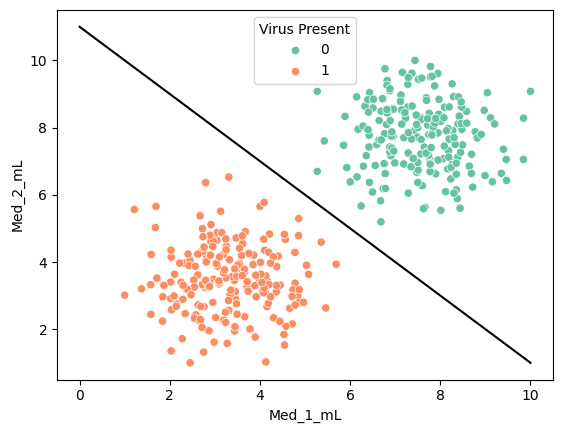

In [11]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present', palette='Set2')

x = np.linspace(0, 10, 100)
m=-1
b=11
y=m*x+b
plt.plot(x, y, color='black')

In [ ]:
def svm_margin_plot(X, y, model):

    X = np.array(X)
    y = np.array(y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.contour(xx, yy, Z, colors='k',
                levels=[-1, 0, 1], alpha=0.7,
                linestyles=['--', '-', '--'])
    plt.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=120, facecolors='none', edgecolors='k', linewidths=1.5)

    plt.title("SVM Decision Boundary & Margin")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

In [16]:
from sklearn.svm import SVC

y = df['Virus Present']
X = df.drop('Virus Present', axis=1)

model = SVC(kernel='linear', C=1000)
model.fit(X, y)

,C,1000
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


C:\Users\ply58\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


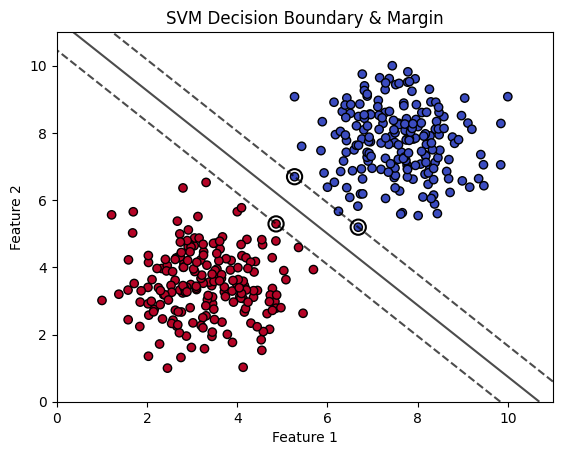

In [17]:
svm_margin_plot(X, y, model)

In [18]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)

,C,0.05
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


C:\Users\ply58\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


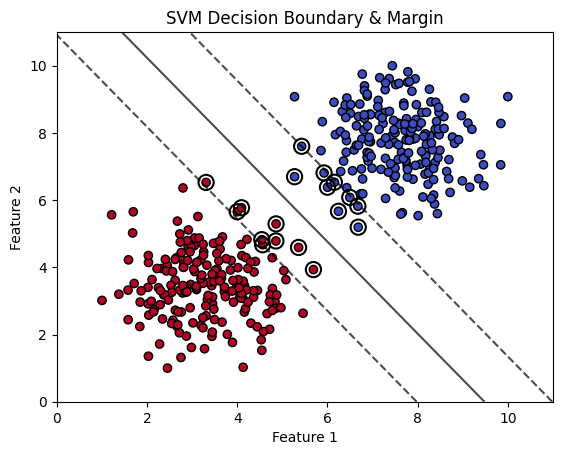

In [19]:
svm_margin_plot(X, y, model)

C:\Users\ply58\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


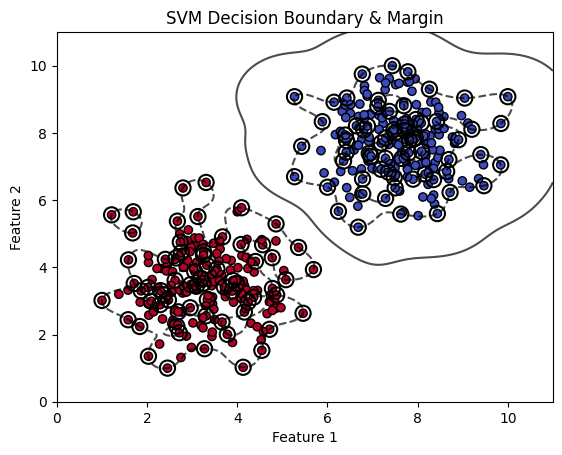

In [24]:
model = SVC(kernel='rbf', C=1, gamma=2)
model.fit(X, y)
svm_margin_plot(X, y, model)

C:\Users\ply58\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


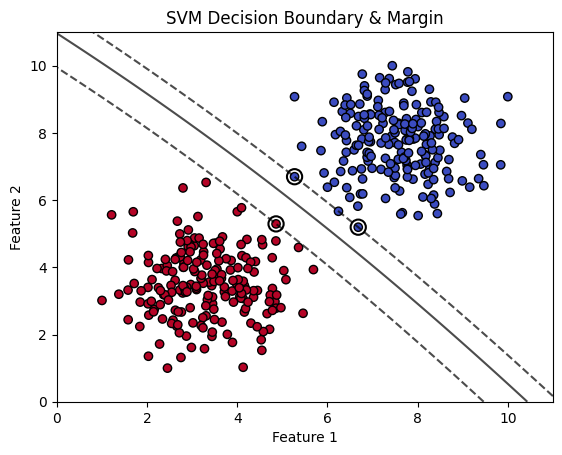

In [26]:
model = SVC(kernel='poly', C=0.05, degree=5)
model.fit(X, y)
svm_margin_plot(X, y, model)

C:\Users\ply58\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


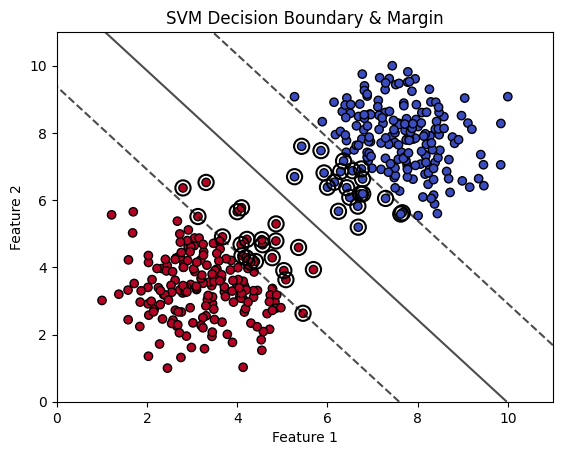

In [29]:
from sklearn.model_selection import GridSearchCV

svm = SVC()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(svm, param_grid, cv=10)
grid_search.fit(X, y)
svm_margin_plot(X, y, grid_search.best_estimator_)